In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten , Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

def mod(initializer=None, dropout_rate=0.0, regularizer=None):
    model=Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(256,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(128,activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(10,activation='softmax')
    ])
    return model

2025-08-05 10:39:14.878877: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 10:39:14.879346: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-05 10:39:14.881652: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-05 10:39:14.887788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754370554.898472   16919 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754370554.90

In [2]:
baseline_model = mod()
baseline_model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, epochs=25, batch_size=64,validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-05 10:39:18.367197: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1840 - loss: 2.2479 - val_accuracy: 0.2732 - val_loss: 2.0976
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2815 - loss: 2.0607 - val_accuracy: 0.3050 - val_loss: 1.9967
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3181 - loss: 1.9672 - val_accuracy: 0.3175 - val_loss: 1.9358
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3314 - loss: 1.9086 - val_accuracy: 0.3354 - val_loss: 1.8991
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3468 - loss: 1.8666 - val_accuracy: 0.3437 - val_loss: 1.8693
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3569 - loss: 1.8471 - val_accuracy: 0.3512 - val_loss: 1.8470
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3628 - loss: 1.8171 - val_accuracy: 0.3573 - val_loss: 1.8253
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3756 - loss: 1.7931 - val_accuracy: 0.

In [3]:
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f'Baseline model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4326 - loss: 1.6112
Baseline model test Accuracy: 0.4326


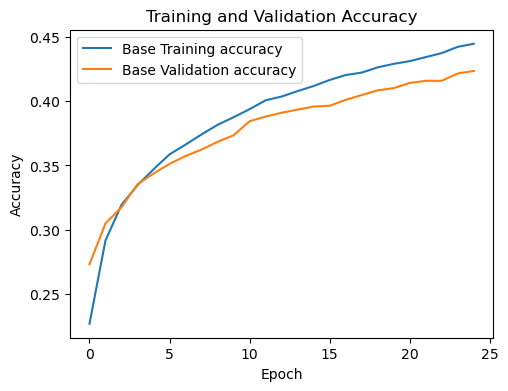

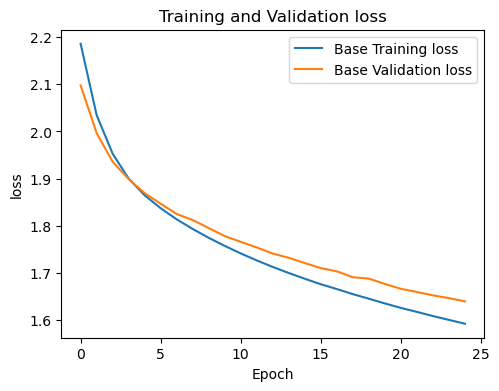

In [4]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['accuracy'],label='Base Training accuracy')
plt.plot(baseline_history.history['val_accuracy'],label='Base Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(baseline_history.history['loss'],label='Base Training loss')
plt.plot(baseline_history.history['val_loss'],label='Base Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [11]:
from tensorflow.keras.initializers import GlorotUniform
xavier_model = mod(initializer=GlorotUniform())
xavier_model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
xavier_history = xavier_model.fit(x_train,y_train,epochs=25,batch_size=64,validation_split=0.2)

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1718 - loss: 2.2543 - val_accuracy: 0.2649 - val_loss: 2.1150
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2696 - loss: 2.0826 - val_accuracy: 0.2895 - val_loss: 2.0120
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3054 - loss: 1.9810 - val_accuracy: 0.3159 - val_loss: 1.9506
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3184 - loss: 1.9327 - val_accuracy: 0.3250 - val_loss: 1.9122
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3394 - loss: 1.8871 - val_accuracy: 0.3389 - val_loss: 1.8785
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3466 - loss: 1.8601 - val_accuracy: 0.3482 - val_loss: 1.8569
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3591 - loss: 1.8259 - val_accuracy: 0.3551 - val_loss: 1.8342
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3696 - loss: 1.8029 - val_accuracy: 0.

In [14]:
test_loss, test_accuracy = xavier_model.evaluate(x_test, y_test, verbose=2)
print(f'Xavier model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4326 - loss: 1.6179
Xavier model test Accuracy: 0.4326


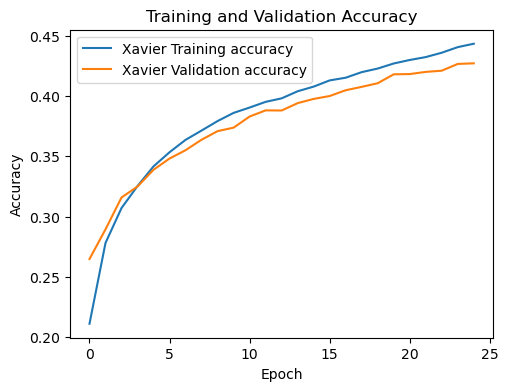

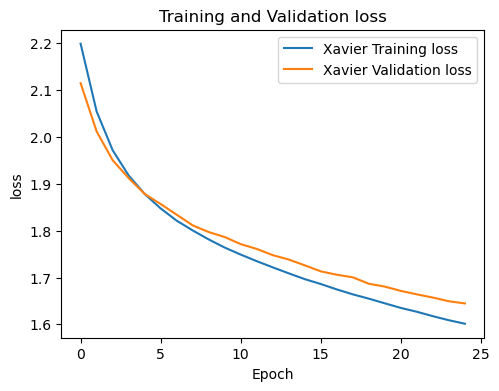

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['accuracy'],label='Xavier Training accuracy')
plt.plot(xavier_history.history['val_accuracy'],label='Xavier Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['loss'],label='Xavier Training loss')
plt.plot(xavier_history.history['val_loss'],label='Xavier Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [19]:
from tensorflow.keras.initializers import HeNormal
kaiming_model = mod(initializer=HeNormal())
kaiming_model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
kaiming_history = xavier_model.fit(x_train,y_train,epochs=75,batch_size=64,validation_split=0.2)

Epoch 1/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4875 - loss: 1.4575 - val_accuracy: 0.4634 - val_loss: 1.5286
Epoch 2/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4971 - loss: 1.4434 - val_accuracy: 0.4693 - val_loss: 1.5249
Epoch 3/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5016 - loss: 1.4309 - val_accuracy: 0.4686 - val_loss: 1.5212
Epoch 4/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5031 - loss: 1.4318 - val_accuracy: 0.4645 - val_loss: 1.5259
Epoch 5/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5059 - loss: 1.4243 - val_accuracy: 0.4701 - val_loss: 1.5136
Epoch 6/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4993 - loss: 1.4330 - val_accuracy: 0.4705 - val_loss: 1.5203
Epoch 7/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5034 - loss: 1.4219 - val_accuracy: 0.4684 - val_loss: 1.5131
Epoch 8/75
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5062 - loss: 1.4163 - val_accuracy: 0.

In [20]:
test_loss, test_accuracy = kaiming_model.evaluate(x_test, y_test, verbose=2)
print(f'Kaiming model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.0998 - loss: 2.5212
Kaiming model test Accuracy: 0.0998


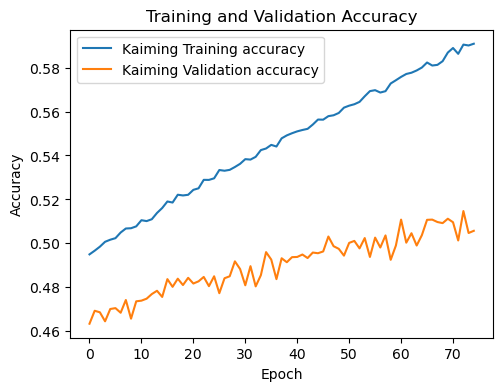

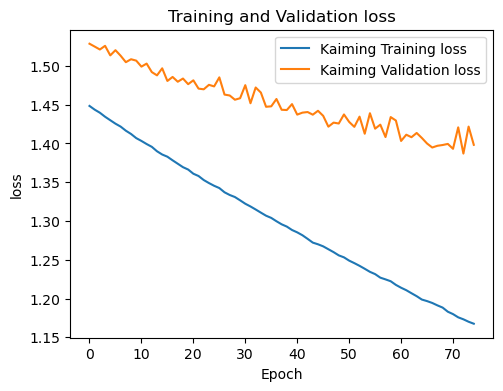

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['accuracy'],label='Kaiming Training accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='Kaiming Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['loss'],label='Kaiming Training loss')
plt.plot(kaiming_history.history['val_loss'],label='Kaiming Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [22]:
dropout_model = mod(dropout_rate=0.5)
dropout_model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
dropout_history = dropout_model.fit(x_train,y_train,epochs=25,batch_size=64,validation_split=0.2)                     

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1152 - loss: 2.5021 - val_accuracy: 0.2163 - val_loss: 2.2489
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1407 - loss: 2.2832 - val_accuracy: 0.2454 - val_loss: 2.2160
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1548 - loss: 2.2555 - val_accuracy: 0.2544 - val_loss: 2.1832
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1663 - loss: 2.2297 - val_accuracy: 0.2702 - val_loss: 2.1558
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1738 - loss: 2.2106 - val_accuracy: 0.2761 - val_loss: 2.1317
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1822 - loss: 2.1944 - val_accuracy: 0.2787 - val_loss: 2.1098
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1945 - loss: 2.1675 - val_accuracy: 0.2849 - val_loss: 2.0871
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1937 - loss: 2.1553 - val_accuracy: 0.

In [23]:
test_loss, test_accuracy = dropout_model.evaluate(x_test, y_test, verbose=2)
print(f'Dropout model test Accuracy: {test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.3495 - loss: 1.8761
Dropout model test Accuracy: 0.3495


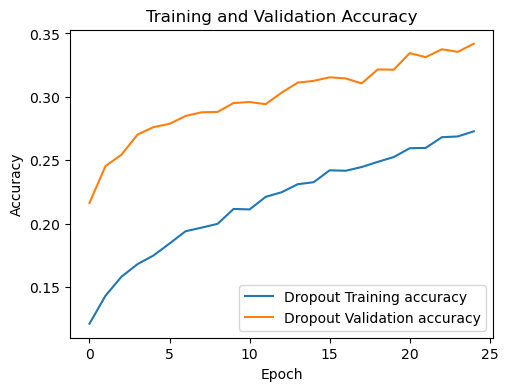

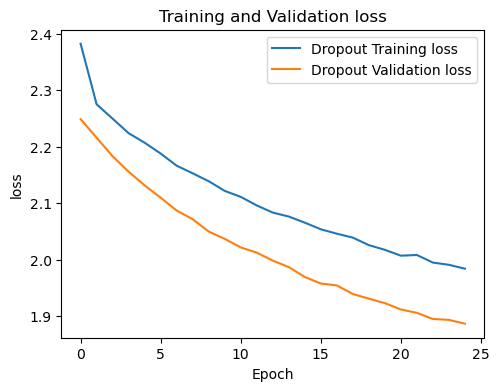

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(dropout_history.history['accuracy'],label='Dropout Training accuracy')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(dropout_history.history['loss'],label='Dropout Training loss')
plt.plot(dropout_history.history['val_loss'],label='Dropout Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [26]:
from tensorflow.keras.regularizers import l2
l2_model = mod(regularizer=l2(0.001))
l2_model.compile(optimizer=SGD(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
l2_history = l2_model.fit(x_train,y_train,epochs=25,batch_size=64,validation_split=0.2)   

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1739 - loss: 3.6395 - val_accuracy: 0.2579 - val_loss: 3.4968
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2804 - loss: 3.4574 - val_accuracy: 0.2885 - val_loss: 3.3856
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3054 - loss: 3.3604 - val_accuracy: 0.3217 - val_loss: 3.3200
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3325 - loss: 3.2954 - val_accuracy: 0.3377 - val_loss: 3.2710
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3470 - loss: 3.2481 - val_accuracy: 0.3462 - val_loss: 3.2406
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3574 - loss: 3.2130 - val_accuracy: 0.3558 - val_loss: 3.2131
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3662 - loss: 3.1859 - val_accuracy: 0.3607 - val_loss: 3.1931
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3710 - loss: 3.1685 - val_accuracy: 0.

In [27]:
test_loss, test_accuracy = l2_model.evaluate(x_test, y_test, verbose=2)
print(f'L2 model test Accuracy: {test_accuracy:.4f}')

313/313 - 1s - 2ms/step - accuracy: 0.4317 - loss: 2.9398
L2 model test Accuracy: 0.4317


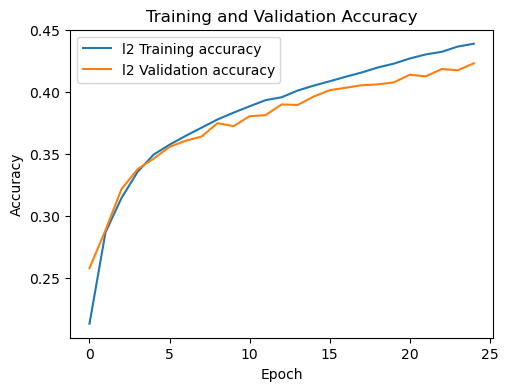

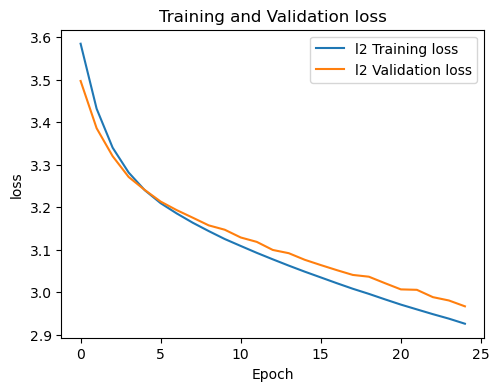

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(l2_history.history['accuracy'],label='l2 Training accuracy')
plt.plot(l2_history.history['val_accuracy'],label='l2 Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(l2_history.history['loss'],label='l2 Training loss')
plt.plot(l2_history.history['val_loss'],label='l2 Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()